In [1]:
import csv
import os
from collections import Counter
unique_entities_strict = set()
unique_entities_lenient = set()
entities = []

text = []
labels = []
labels_lenient = []
working_folder = "./custom_output/"

with open(os.path.join(working_folder, "ner-crf-training-data.tsv"), newline = '') as lines:  
#     line_reader = csv.reader(lines, delimiter='\t')
    line_reader = csv.reader(lines, delimiter='\t', quoting=csv.QUOTE_NONE)
    sentence = []
    entities = []
    pre_entity = "NEVER_EXISTS_ENTITY"
    for idx, line in enumerate(line_reader):
        ## . signal the begining of a new line
        ## skip empty line
        if line == []:
            continue
        ## to do what is the better way to determine the end of a sentence
        if line[0] == '.' and line[1] == "O" and len(sentence)>1:
            text.append(" ".join(sentence + [line[0]]))
            labels.append(" ".join(entities + [line[1]]))
            sentence, entities = [] , []
            strict_entity = line[1]
        else:
            sentence.append(line[0])
            if line[1] != "O" and pre_entity == line[1]:
                entities.append("I-"+line[1])
                strict_entity = "I-"+line[1]
            elif line[1] != "O" and pre_entity != line[1]:
                entities.append("B-"+line[1])
                strict_entity = "B-"+line[1]
            else:
                entities.append(line[1])
                strict_entity = line[1]
        
        
        labels_lenient.append(line[1])
#         print(line, line_reader[idx], line_reader[idx+1])
        
        unique_entities_strict.add(strict_entity)
        unique_entities_lenient.add(line[1])
        entities.append(line[1])
        pre_entity = line[1]


In [2]:
import pandas as pd
new_df = pd.DataFrame({"text": text, "labels": labels})
new_df.head()
new_df.to_csv(os.path.join(working_folder, "ner.csv"))

In [3]:
print(f"Unique entities count:\nStrict: {len(unique_entities_strict)}\nLenient: {len(unique_entities_lenient)}")


Unique entities count:
Strict: 19
Lenient: 10


In [4]:
print(unique_entities_strict)

{'B-Drug', 'I-Reason', 'B-Reason', 'I-Form', 'B-Strength', 'B-Frequency', 'B-Dosage', 'I-Drug', 'I-Ade', 'B-Ade', 'B-Duration', 'I-Frequency', 'I-Duration', 'I-Dosage', 'B-Form', 'O', 'B-Route', 'I-Strength', 'I-Route'}


In [5]:
unique_entities_lenient

{'Ade',
 'Dosage',
 'Drug',
 'Duration',
 'Form',
 'Frequency',
 'O',
 'Reason',
 'Route',
 'Strength'}

Visualize data

/home/le/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


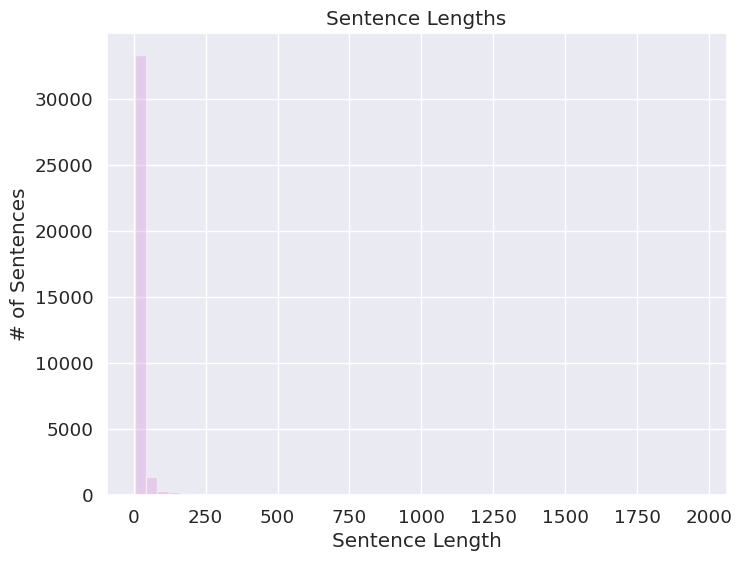

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sentence_length = [len(str.split()) for str in text]

## sanity check (await for validate)
# import numpy as np
# count_dict = Counter(sentence_length)
# print(sorted(count_dict.items(), key=lambda x: x[1], reverse=True))
# print(set(sentence_length))
# idx = np.where(np.asarray(sentence_length)==3)[0]
# print(idx, len(idx))
# print(text[idx[5]])
# print(text[:idx[5]])

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.2)
plt.figure(figsize=(8,6))

# Plot the distribution of comment lengths.
sns.distplot(sentence_length, kde=False, rug=False,color='plum', bins=50)

plt.title('Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('# of Sentences');

     entity    count
0         O  1508251
1    B-Drug    15671
2      Drug    18737
3  B-Reason     3770
4    Reason     6444


/home/le/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


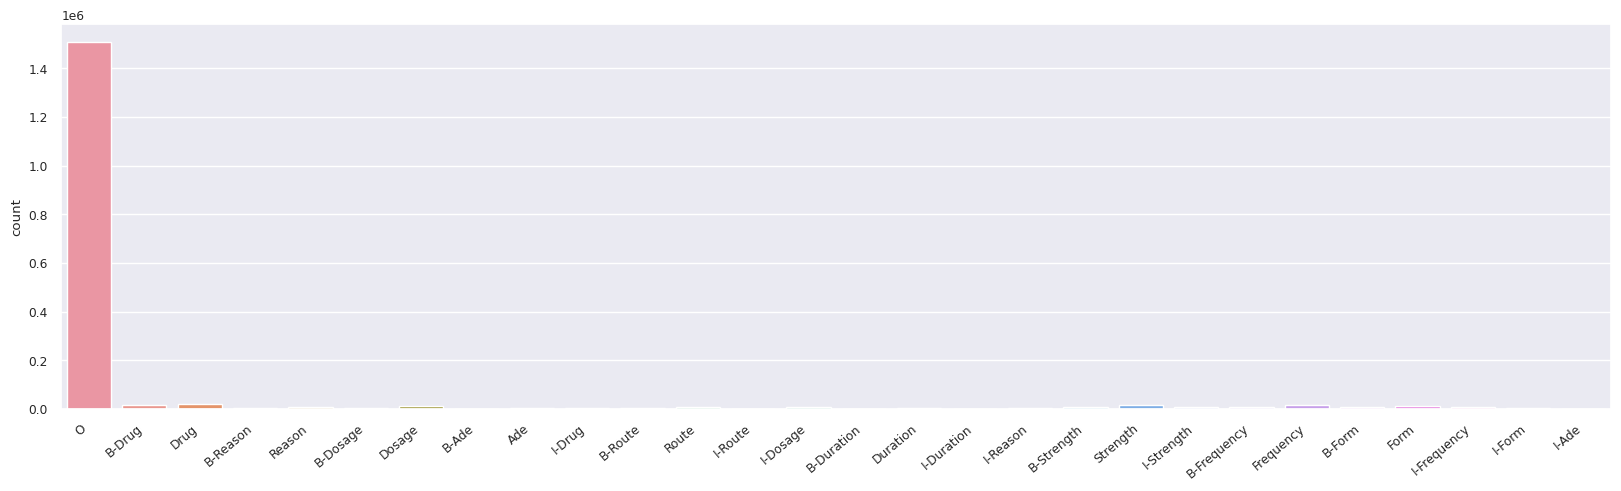

In [7]:

import itertools
all_labels = list(itertools.chain(*[l.split() for l in labels]))
label_count = dict(Counter(all_labels))
tmp_df = pd.DataFrame({"entity": label_count.keys(), "count": label_count.values()})
print(tmp_df.head())

sns.set(font_scale=0.8)
plt.figure(figsize=(20,5))
ax = sns.countplot(all_labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");


      entity   count
0          O  754248
1       Drug   18737
2     Reason    6444
3     Dosage   12185
4        Ade    1624
5      Route    5732
6   Duration    1536
7   Strength   14529
8  Frequency   14498
9       Form    9833


/home/le/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


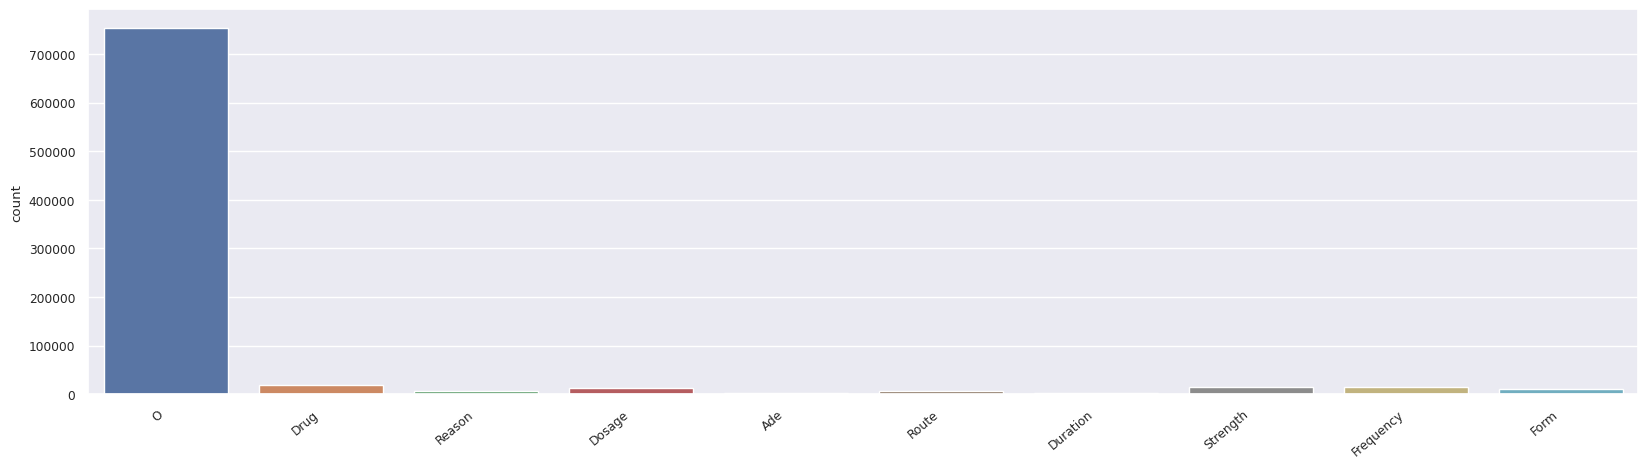

In [8]:
from collections import Counter
import itertools

label_count = dict(Counter(labels_lenient))
tmp_df = pd.DataFrame({"entity": label_count.keys(), "count": label_count.values()})
print(tmp_df)

sns.set(font_scale=0.8)
plt.figure(figsize=(20,5))
ax = sns.countplot(labels_lenient)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");